  letter  x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  xybar  \
0      T      2      8      3     5      1      8     13      0      6      6   
1      I      5     12      3     7      2     10      5      5      4     13   
2      D      4     11      6     8      6     10      6      2      6     10   
3      N      7     11      6     6      3      5      9      4      6      4   
4      G      2      1      3     1      1      8      6      6      6      6   

   x2ybar  xy2bar  x-ege  xegvy  y-ege  yegvx  
0      10       8      0      8      0      8  
1       3       9      2      8      4     10  
2       3       7      3      7      3      9  
3       4      10      6     10      2      8  
4       5       9      1      7      5     10  
Dataset shape: (20000, 17)
Feature range after scaling: min= 0.0 max= 1.0
Labels one-hot shape: (20000, 26)
X_train shape: (16000, 16)
X_test shape: (4000, 16)
y_train shape: (16000, 26)
y_test shape: (4000, 26)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 512)            │         8,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 26)             │        13,338 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 284,698 (1.09 MB)

 Trainable params: 284,698 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.2479 - loss: 2.7728 - val_accuracy: 0.5715 - val_loss: 1.6118
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5591 - loss: 1.5438 - val_accuracy: 0.6758 - val_loss: 1.2083
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6361 - loss: 1.2505 - val_accuracy: 0.7080 - val_loss: 1.0423
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6750 - loss: 1.1080 - val_accuracy: 0.7297 - val_loss: 0.9275
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7103 - loss: 0.9752 - val_accuracy: 0.7552 - val_loss: 0.8373
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7404 - loss: 0.8807 - val_accuracy: 0.7970 - val_loss: 0.7359
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7548 - loss: 0.8103 - val_accuracy: 0.8008 - val_loss: 0.6808
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7732 - loss: 0.7412 - val_accuracy:

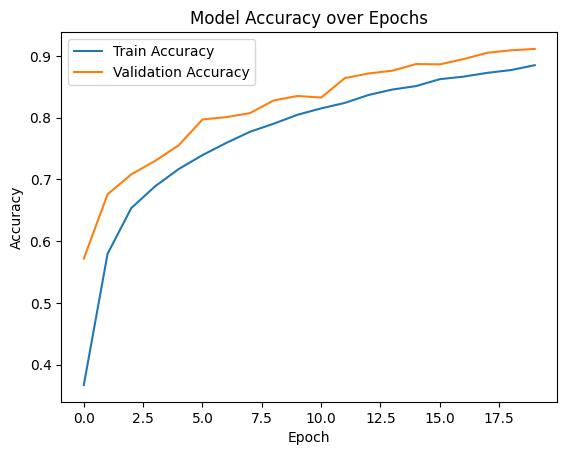

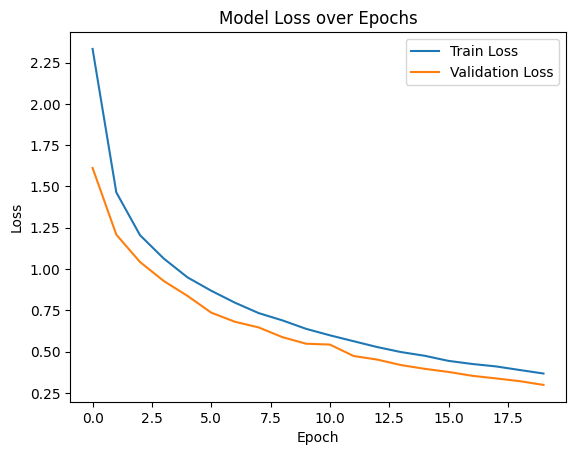

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

# ============================================================
# PROJECT: Multiclass classification on OCR Letter Recognition dataset
# OBJECTIVE: Build a deep neural network to classify handwritten letters (A-Z)
# DATA: 20,000 instances from the UCI Letter Recognition dataset
#       Each sample: a capital letter (A-Z) and 16 integer attributes extracted from the image
# DOMAIN: OCR & Document Analysis
# ============================================================

# ---------------------- Definitions -------------------------
# Sample: One instance of data (features + label).
# Feature: An input variable used by the model (here, 16 statistical attributes per image).
# Label: The target output (here, a letter class from 0-25).
# Epoch: One full pass over the entire training dataset during training.
# Batch size: Number of samples processed before updating model weights.
# Dense layer: Fully connected neural network layer.
# Activation function: Non-linear function applied at each neuron (e.g., ReLU, softmax).
# ReLU (Rectified Linear Unit): f(x)=max(0,x), introduces non-linearity.
# Softmax: Converts raw output scores into probabilities that sum to 1 for multiclass.
# Dropout: Randomly disables a fraction of neurons each epoch to prevent overfitting.
# Overfitting: When a model performs well on training data but poorly on unseen data.
# Loss function: Measures error; categorical_crossentropy compares predicted vs true class distributions.
# Optimizer: Algorithm to adjust weights based on gradients (here, RMSprop).
# Accuracy: Fraction of correct predictions.

# -------------------- Load the Dataset ---------------------
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data'
column_names = [
    'letter', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar',
    'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'x-ege', 'xegvy', 'y-ege', 'yegvx'
]
# Read CSV from URL with no header; assign column names
data = pd.read_csv(url, header=None, names=column_names)
print(data.head())              # Show first 5 rows
print("Dataset shape:", data.shape)  # Expect (20000, 17)

# ------------------- Preprocess Features -------------------
# X: numerical features (16 columns), converted to float32 and scaled
X = data.iloc[:, 1:].values.astype('float32')
# Scale inputs to [0,1] by dividing by max possible value (15)
X /= 15.0
print("Feature range after scaling: min=", X.min(), "max=", X.max())

# -------------------- Preprocess Labels --------------------
# Map letters A-Z to integers 0-25
letters = data['letter'].values
label_indices = np.array([ord(c) - ord('A') for c in letters])
# One-hot encode labels: shape (20000,26)
num_classes = 26
y = np.eye(num_classes)[label_indices]
print("Labels one-hot shape:", y.shape)

# -------------------- Train/Test Split ---------------------
# Split into 80% train, 20% test sets; random_state ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# -------------------- Build the Model ----------------------
model = Sequential()
# Input layer: Dense with 512 neurons, ReLU activation
# - input_shape=(16,) expects 16 features per sample
model.add(Dense(512, activation='relu', input_shape=(16,)))
# Dropout layer: randomly sets 20% of inputs to zero each epoch to prevent overfitting
model.add(Dropout(0.2))
# Hidden Dense layer: another 512 neurons with ReLU
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
# Output layer: 26 neurons (one per letter class) with softmax activation
# - Softmax ensures output probabilities sum to 1 across classes
model.add(Dense(num_classes, activation='softmax'))
model.summary()  # Prints layer names, output shapes, and parameter counts

# ---------------------- Compile Model ----------------------
# loss='categorical_crossentropy' for multiclass one-hot labels
# optimizer=RMSprop() uses root mean square propagation to update weights
# metrics=['accuracy'] reports the fraction of correct predictions
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy']
)

# ----------------------- Train Model -----------------------
batch_size = 128    # Samples per gradient update
epochs = 20         # Full passes through training data
# model.fit returns a History object containing loss & accuracy per epoch
history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,                    # 1 = progress bar
    validation_data=(X_test, y_test)  # Evaluate loss & metrics on test set each epoch
)

# ----------------------- Evaluate Model --------------------
# Final evaluation on the unseen test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# ------------------- Plot Training Curves ------------------
# Graph 1: Accuracy vs Epoch
#   - X-axis: Epoch number
#   - Y-axis: Accuracy (fraction correct)
#   - Two curves: training accuracy & validation accuracy
#   - Interpretation: convergence, under/overfitting if curves diverge
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Graph 2: Loss vs Epoch
#   - X-axis: Epoch number
#   - Y-axis: Loss (categorical crossentropy)
#   - Two curves: training loss & validation loss
#   - Interpretation: model convergence; rising validation loss indicates overfitting
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Thought for 4 seconds


Below is a function‑by‑function, parameter‑by‑parameter walkthrough of your OCR Letter‑Recognition script, starting from the very basics and explaining **why** each piece is used.

---

## 1. Imports & Why We Need Them

```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
```

* **`numpy` (`np`)**
  Fundamental package for numerical computing in Python. We use it for array operations, e.g. indexing and one‑hot encoding.
* **`pandas` (`pd`)**
  High‑level data‐structure library. We use `pd.read_csv` to load tabular data into a DataFrame for easy slicing, inspection, and conversion to NumPy.
* **`matplotlib.pyplot` (`plt`)**
  Standard plotting library. We use it to visualize training/validation loss and accuracy curves.
* **`train_test_split`**
  Utility that shuffles and splits arrays or matrices into random train and test subsets.
* **Keras (`tensorflow.keras`)**
  High‑level neural‑network API.

  * **`Sequential`**: a linear stack of layers.
  * **`Dense`**: a fully connected (aka “dense”) layer.
  * **`Dropout`**: regularization layer that randomly zeros inputs to reduce overfitting.
  * **`RMSprop`**: an optimizer that divides the learning rate by a running average of recent gradient magnitudes.

---

## 2. Loading the Dataset

```python
url = 'https://archive.ics.uci.edu/ml/…/letter-recognition.data'
column_names = [ 'letter', 'x-box', …, 'yegvx' ]
data = pd.read_csv(url, header=None, names=column_names)
```

* **`pd.read_csv(path_or_url, header=None, names=…)`**

  * **`path_or_url`**: location of the CSV file (local path or web URL).
  * **`header=None`**: tells pandas that the first row is data, not column headers.
  * **`names=column_names`**: supplies our own list of 17 column names.
  * **Returns**: a `DataFrame` with shape `(20000, 17)` where column 0 is the letter label and columns 1–16 are integer features.

---

## 3. Preprocessing Features

```python
X = data.iloc[:, 1:].values.astype('float32')
X /= 15.0
```

1. **`data.iloc[:, 1:]`**

   * **`.iloc[row_idx, col_idx]`**: integer‑position based selection.
   * `:` selects all rows; `1:` selects columns 1–16 (the 16 numeric attributes).

2. **`.values`**

   * Converts the selected slice into a NumPy `ndarray`.

3. **`.astype('float32')`**

   * Casts integer values to 32‑bit floats for compatibility/performance in TensorFlow.

4. **`X /= 15.0`**

   * In‑place division scales each feature to the $[0,1]$ range, since the original values range from 0–15.
   * **Why scale?** Neural networks converge faster & more stably when inputs are on a similar scale.

---

## 4. Preprocessing Labels

```python
letters = data['letter'].values
label_indices = np.array([ord(c) - ord('A') for c in letters])
num_classes = 26
y = np.eye(num_classes)[label_indices]
```

1. **`data['letter']`**

   * Selects the “letter” column (characters ‘A’–‘Z’).

2. **`.values`**

   * Converts to a NumPy array of shape `(20000,)` containing characters.

3. **`[ord(c) - ord('A') for c in letters]`**

   * **`ord(c)`** gives the Unicode code point of character `c`.
   * Subtracting `ord('A')` maps ‘A’→0, ‘B’→1, …, ‘Z’→25.
   * Creates an integer label array `label_indices` of shape `(20000,)`.

4. **`np.eye(num_classes)[label_indices]`**

   * **`np.eye(N)`** creates an $N\times N$ identity matrix.
   * Indexing with `label_indices` selects rows to build a one‑hot matrix of shape `(20000, 26)`.
   * Each label becomes a length‑26 vector with a single 1 at the true class index.

5. **Why one‑hot?**
   Keras’s `categorical_crossentropy` loss expects targets in one‑hot format for multiclass.

---

## 5. Splitting Into Train & Test Sets

```python
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)
```

* **`train_test_split(X, y, test_size, random_state)`**

  * **`X, y`**: features and labels.
  * **`test_size=0.20`**: 20% of samples go to the test set; 80% remain for training.
  * **`random_state=42`**: seed for the random number generator, ensuring reproducible splits.
  * **Returns**: four arrays `(X_train, X_test, y_train, y_test)`.

* **Why split?**
  To evaluate performance on “unseen” data and detect overfitting.

---

## 6. Building the Neural Network

```python
model = Sequential()

# Layer 1: Dense
model.add(Dense(512, activation='relu', input_shape=(16,)))

# Layer 2: Dropout
model.add(Dropout(0.2))

# Layer 3: Dense
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(num_classes, activation='softmax'))

model.summary()
```

1. **`Sequential()`**
   Initializes an empty linear model to which we will add layers in order.

2. **`Dense(units, activation, input_shape)`**

   * **`units=512`**: number of neurons in this layer.
   * **`activation='relu'`**: applies ReLU ($\max(0,x)$) element‑wise, introducing non‑linearity so the network can learn complex patterns.
   * **`input_shape=(16,)`**: required on the first layer to tell Keras the size of each input sample (16 features).

3. **`Dropout(rate)`**

   * **`rate=0.2`**: during each training update, 20% of this layer’s outputs are randomly zeroed.
   * **Why?** Prevents co‑adaptation of neurons and overfitting by forcing the network to learn redundant representations.

4. **Second `Dense` + `Dropout`**
   Adds capacity (another 512‑unit layer) and further regularization.

5. **Output `Dense(num_classes, activation='softmax')`**

   * **`units=26`**: one output neuron per class (A–Z).
   * **`activation='softmax'`**: converts raw scores (logits) into a probability distribution over 26 classes, summing to 1.

6. **`model.summary()`**
   Prints a table of each layer’s name, output shape, and number of parameters—handy for a sanity check.

---

## 7. Compiling the Model

```python
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy']
)
```

1. **`loss='categorical_crossentropy'`**

   * Suitable for multiclass classification with one‑hot labels.
   * Formula for a single sample with true distribution $y$ and predicted distribution $\hat y$:

     $$
       -\sum_{i=1}^{26} y_i \log(\hat y_i).
     $$

2. **`optimizer=RMSprop()`**

   * RMSprop divides the learning rate by an exponentially decaying average of squared gradients.
   * It helps maintain a stable step size and often converges faster than plain SGD.

3. **`metrics=['accuracy']`**

   * During training and evaluation, Keras will compute the fraction of correct predictions (highest‑probability class matches the true label).

---

## 8. Training the Model

```python
history = model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=20,
    verbose=1,
    validation_data=(X_test, y_test)
)
```

* **`X_train, y_train`**: training data.
* **`batch_size=128`**: number of samples per gradient update.
* **`epochs=20`**: number of full passes through the training set.
* **`verbose=1`**: displays a progress bar with loss & metrics each epoch.
* **`validation_data=(X_test, y_test)`**: after each epoch, evaluate loss & accuracy on the test set to monitor generalization.

**Why these choices?**

* A moderate batch size balances computational efficiency with gradient noise.
* Validation at each epoch lets you spot overfitting if validation metrics start to worsen.

---

## 9. Evaluating Performance

```python
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
```

* **`model.evaluate(X, y)`**
  Computes loss and any metrics you requested (accuracy) on the given data.
* **`verbose=0`**
  Suppresses per‑batch logging for a cleaner summary.

---

## 10. Plotting Training Curves

```python
# Accuracy vs. Epoch
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss vs. Epoch
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
```

* **`plt.figure()`**
  Creates a new figure window.
* **`plt.plot(x, y, label=…)`**
  Plots `y` vs. `x` (here, epoch index vs. metric).
* **`history.history['…']`**
  A dictionary of lists recorded during training:

  * `'accuracy'` and `'val_accuracy'` for training/validation accuracy.
  * `'loss'` and `'val_loss'` for training/validation loss.
* **`plt.title()`, `plt.xlabel()`, `plt.ylabel()`**
  Add descriptive titles and axis labels.
* **`plt.legend()`**
  Displays the legend to distinguish train vs. validation curves.
* **`plt.show()`**
  Renders the plot.

**Why plot?**
Visualizing these curves helps you detect:

* **Underfitting**: both loss curves stay high.
* **Convergence**: loss steadily decreases.
* **Overfitting**: validation loss rises while training loss falls.

---

### Summary

Every function and parameter above serves to:

1. **Load** and **inspect** the data (`pd.read_csv`, `.head()`, `.shape`).
2. **Preprocess** inputs and labels (scaling + one‑hot encoding) for numeric stability and correct loss computation.
3. **Split** into train/test to evaluate generalization.
4. **Build** a deep neural network (`Sequential`, `Dense`, `Dropout`) that can learn complex decision boundaries.
5. **Compile** with a suitable loss (`categorical_crossentropy`), optimizer (`RMSprop`), and metric (`accuracy`).
6. **Train** while monitoring validation performance.
7. **Evaluate** on held‑out data.
8. **Visualize** learning dynamics to diagnose model behavior.

This pipeline—from raw CSV to plotted training curves—is the canonical workflow for multiclass classification with Keras.
